In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras import utils
try:
    from tensorflow.keras.utils import image_dataset_from_directory  # for tf 2.10
except ImportError:
    from tensorflow.keras.preprocessing import image_dataset_from_directory  # for tf 2.5
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import time

import dcgan

# Load images

all images must be in a folder called dataset like below:

`
-- dataset         
   -- emojis       
      -- image1.png
      -- image2.png
      .            
      .            
      .            
      -- imagen.png
`

https://drive.google.com/file/d/1APkxEWu8Is7pZ-0tCjL8CabSRnyI6IRE/view?usp=sharing

In [4]:
#Path of the dataset
dataset_path = Path(r'C:\Users\Debprasad Kundu\Downloads\dataset')

In [5]:
images = ImageDataGenerator(preprocessing_function=lambda x: 2 * x/255.0 - 1)
images = images.flow_from_directory(dataset_path, target_size=(32, 32), class_mode=None, 
                                    batch_size=32)

Found 22103 images belonging to 2 classes.


In [6]:
images = image_dataset_from_directory(
    dataset_path, image_size=(32, 32), batch_size=128, labels=None
).map(lambda x: 2 * x/255.0 - 1)

Found 22103 files belonging to 1 classes.


In [7]:
plt.imshow((images[1][20] + 1)/2)

TypeError: 'MapDataset' object is not subscriptable

# Model architecture

In [8]:
latent_dim = 100

class MyDCGAN(dcgan.DCGAN):
    def make_generator(self):
        return keras.Sequential([
            layers.InputLayer((latent_dim,)),
            
            layers.Dense(4 * 4 * 128),
            layers.BatchNormalization(),
            layers.ReLU(),
            
            layers.Reshape((4, 4, 128)),
            
            # layers.UpSampling2D(),
            # layers.Conv2D(64, kernel_size=4, strides=1, padding='same'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            
            # layers.UpSampling2D(),
            # layers.Conv2D(32, kernel_size=4, strides=1, padding='same'),
            layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            
            # layers.UpSampling2D(),
            # layers.Conv2D(3, kernel_size=4, strides=1, padding='same'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same'),
            layers.Activation('tanh')
        ])
    
    def make_discriminator(self):
        return keras.Sequential([
            layers.InputLayer((32, 32, 3)),
            
            layers.Conv2D(32, kernel_size=4, strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
#             layers.Dropout(0.3),
            
            layers.Conv2D(64, kernel_size=4, strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
#             layers.Dropout(0.3),
            
            layers.Conv2D(128, kernel_size=4, strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
#             layers.Dropout(0.3),
            
            layers.Flatten(),
            layers.Dense(1)#,
#             layers.Activation('sigmoid')
        ])

In [9]:
gan = MyDCGAN()
gan.compile(
    gen_opt=keras.optimizers.Adam(0.001),
    disc_opt=keras.optimizers.Adam(0.0001),
#     loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
    loss_fn=keras.losses.MeanSquaredError(tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE),
    run_eagerly=True
)

In [10]:
# import importlib
# importlib.reload(dcgan)

In [11]:
seed = tf.random.normal((16, 100))

Epoch 1/50
173/173 [==============================] - ETA: 0s - gen_loss: 0.0475 - disc_loss: 0.1747

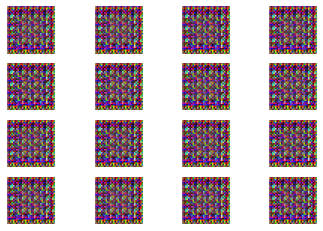

173/173 [==============================] - 111s 605ms/step - gen_loss: 0.0475 - disc_loss: 0.1747
Epoch 2/50
173/173 [==============================] - 84s 479ms/step - gen_loss: 0.0183 - disc_loss: 0.1317
Epoch 3/50
173/173 [==============================] - 84s 482ms/step - gen_loss: 0.0344 - disc_loss: 0.0594
Epoch 4/50
173/173 [==============================] - 81s 465ms/step - gen_loss: 0.0337 - disc_loss: 0.0503
Epoch 5/50
173/173 [==============================] - 81s 461ms/step - gen_loss: 0.0442 - disc_loss: 0.0451
Epoch 6/50
173/173 [==============================] - 78s 448ms/step - gen_loss: 0.0474 - disc_loss: 0.0313
Epoch 7/50
173/173 [==============================] - 82s 469ms/step - gen_loss: 0.0221 - disc_loss: 0.0239
Epoch 8/50
173/173 [==============================] - 78s 448ms/step - gen_loss: 0.0719 - disc_loss: 0.0445
Epoch 9/50
173/173 [==============================] - 79s 450ms/step - gen_loss: 0.0253 - disc_loss: 0.0236
Epoch 10/50
173/173 [=================

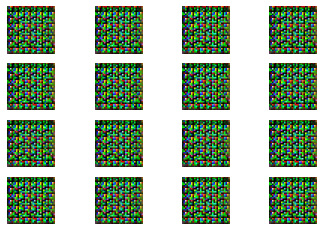

173/173 [==============================] - 87s 500ms/step - gen_loss: 0.0047 - disc_loss: 0.0177
Epoch 12/50
173/173 [==============================] - 99s 567ms/step - gen_loss: 0.0102 - disc_loss: 0.0205
Epoch 13/50
173/173 [==============================] - 98s 563ms/step - gen_loss: 0.0124 - disc_loss: 0.0164
Epoch 14/50
173/173 [==============================] - 101s 578ms/step - gen_loss: 0.0064 - disc_loss: 0.0143
Epoch 15/50
173/173 [==============================] - 102s 583ms/step - gen_loss: 0.0038 - disc_loss: 0.0152
Epoch 16/50
173/173 [==============================] - 101s 576ms/step - gen_loss: 0.0693 - disc_loss: 0.0266
Epoch 17/50
173/173 [==============================] - 102s 582ms/step - gen_loss: 0.0084 - disc_loss: 0.0178
Epoch 18/50
173/173 [==============================] - 101s 577ms/step - gen_loss: 0.0126 - disc_loss: 0.0195
Epoch 19/50
173/173 [==============================] - 102s 582ms/step - gen_loss: 0.0236 - disc_loss: 0.0209
Epoch 20/50
173/173 [====

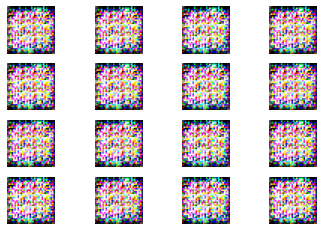

173/173 [==============================] - 145s 834ms/step - gen_loss: 0.0079 - disc_loss: 0.0141
Epoch 22/50
173/173 [==============================] - 89s 511ms/step - gen_loss: 0.0066 - disc_loss: 0.0138
Epoch 23/50
173/173 [==============================] - 89s 511ms/step - gen_loss: 0.0031 - disc_loss: 0.0109
Epoch 24/50
173/173 [==============================] - 89s 510ms/step - gen_loss: 0.0068 - disc_loss: 0.0105
Epoch 25/50
173/173 [==============================] - 89s 509ms/step - gen_loss: 0.0045 - disc_loss: 0.0101
Epoch 26/50
173/173 [==============================] - 89s 510ms/step - gen_loss: 0.0037 - disc_loss: 0.0076
Epoch 27/50
173/173 [==============================] - 89s 511ms/step - gen_loss: 0.0121 - disc_loss: 0.0102
Epoch 28/50
173/173 [==============================] - 89s 512ms/step - gen_loss: 0.0025 - disc_loss: 0.0079
Epoch 29/50
173/173 [==============================] - 84s 481ms/step - gen_loss: 0.0027 - disc_loss: 0.0086
Epoch 30/50
173/173 [=========

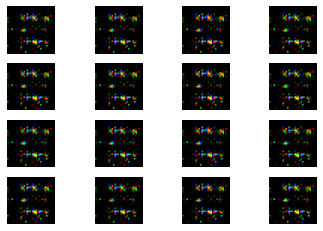

173/173 [==============================] - 87s 497ms/step - gen_loss: 0.1577 - disc_loss: 0.0102
Epoch 32/50
173/173 [==============================] - 75s 425ms/step - gen_loss: 0.1544 - disc_loss: 0.0147
Epoch 33/50
173/173 [==============================] - 74s 423ms/step - gen_loss: 0.0197 - disc_loss: 0.0073
Epoch 34/50
173/173 [==============================] - 74s 421ms/step - gen_loss: 0.0656 - disc_loss: 0.0086
Epoch 35/50
173/173 [==============================] - 74s 424ms/step - gen_loss: 0.0035 - disc_loss: 0.0059
Epoch 36/50
173/173 [==============================] - 74s 424ms/step - gen_loss: 0.0018 - disc_loss: 0.0048
Epoch 37/50
173/173 [==============================] - 74s 421ms/step - gen_loss: 0.0157 - disc_loss: 0.0068
Epoch 38/50
173/173 [==============================] - 88s 506ms/step - gen_loss: 0.0634 - disc_loss: 0.0153
Epoch 39/50
173/173 [==============================] - 90s 515ms/step - gen_loss: 0.1381 - disc_loss: 0.0135
Epoch 40/50
173/173 [==========

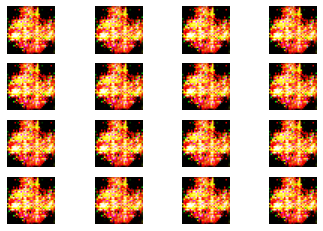

173/173 [==============================] - 91s 523ms/step - gen_loss: 0.0428 - disc_loss: 0.0089
Epoch 42/50
173/173 [==============================] - 87s 497ms/step - gen_loss: 0.1001 - disc_loss: 0.0083
Epoch 43/50
173/173 [==============================] - 78s 444ms/step - gen_loss: 0.0187 - disc_loss: 0.0055
Epoch 44/50
173/173 [==============================] - 71s 405ms/step - gen_loss: 0.0013 - disc_loss: 0.0034
Epoch 45/50
173/173 [==============================] - 74s 425ms/step - gen_loss: 0.0038 - disc_loss: 0.0037
Epoch 46/50
173/173 [==============================] - 78s 444ms/step - gen_loss: 0.0156 - disc_loss: 0.0047
Epoch 47/50
173/173 [==============================] - 83s 476ms/step - gen_loss: 0.2711 - disc_loss: 0.0091
Epoch 48/50
173/173 [==============================] - 83s 477ms/step - gen_loss: 0.0036 - disc_loss: 0.0039
Epoch 49/50
173/173 [==============================] - 86s 491ms/step - gen_loss: 0.1254 - disc_loss: 0.0053
Epoch 50/50
173/173 [==========

In [12]:
gan.fit(images, epochs=50, callbacks=[dcgan.SaveImage(seed)])#, ShowImage(seed)])

In [13]:
gan.generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              206848    
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 2048)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 64)         131136    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         2

In [14]:
gan.discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        1568      
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 8, 8, 64)         

In [15]:
a = _

In [16]:
a.history['gen_loss']

[0.047528211027383804,
 0.018297966569662094,
 0.03435376659035683,
 0.033670295029878616,
 0.04419393464922905,
 0.04737192019820213,
 0.02211526222527027,
 0.07189662754535675,
 0.025288313627243042,
 0.017610974609851837,
 0.004713970236480236,
 0.010195709764957428,
 0.012409319169819355,
 0.006434672977775335,
 0.0037602982483804226,
 0.06928034126758575,
 0.008377108722925186,
 0.012635852210223675,
 0.023616481572389603,
 0.008164163678884506,
 0.00790789257735014,
 0.006582941394299269,
 0.0030760641675442457,
 0.006792481057345867,
 0.004460122901946306,
 0.003743670880794525,
 0.012125751003623009,
 0.0024585388600826263,
 0.0026820776984095573,
 0.002684469800442457,
 0.1576862931251526,
 0.15441635251045227,
 0.01965343952178955,
 0.06559114158153534,
 0.003516953205689788,
 0.0017920491518452764,
 0.015688400715589523,
 0.06344916671514511,
 0.13805930316448212,
 0.010910323821008205,
 0.04276607558131218,
 0.10014431178569794,
 0.01870649680495262,
 0.0013248439645394683,

In [17]:
gan.generator(seed).numpy().max()

1.0

In [18]:
gan.discriminator(gan.generator(seed))#.numpy().max()

<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[0.6825654 ],
       [0.68440133],
       [0.6747275 ],
       [0.68604267],
       [0.671648  ],
       [0.6789738 ],
       [0.67132556],
       [0.67068285],
       [0.6773459 ],
       [0.67353994],
       [0.67829055],
       [0.68591684],
       [0.66415006],
       [0.6772869 ],
       [0.66341937],
       [0.676462  ]], dtype=float32)>